In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data_from_trip_practice_only.csv")
df.head()

,countrynameen,country_grouped,masterhotelid,masterhotelname,hotel_category,wkn_period,this_wk_in_cpn,this_wk_order,this_wk_uv,financial_revenue_past_4w,...,availability_tag,availability,bookable_ratio,lose_rate_final,lose_rate_tag,competitive_tag,hotelrating,htl_ct,htl_order_rank,top_pct_10
0,Malaysia,Malaysia,699489,"槟城火烈鸟海滩酒店(Flamingo Hotel by The Beach, Penang)",NaN,11/15/2021,0,188,2218,41296.01,...,A,0.9185,1.0,0.3165,B,B,4.2,2135,1,1
1,Malaysia,Malaysia,698563,吉隆坡棉兰东姑普雷斯科特酒店(Prescott Hotel Kuala Lumpur Med...,NaN,11/15/2021,0,147,707,16001.78,...,A,0.9162,1.0,0.2614,B,B,4.3,2135,2,1
2,Malaysia,Malaysia,698608,吉隆坡皇家朱兰酒店(Royale Chulan Kuala Lumpur),NaN,11/15/2021,0,141,1770,15879.86,...,A,0.9554,1.0,0.3057,B,B,4.4,2135,3,1
3,Malaysia,Malaysia,695037,KSL度假酒店(KSL Hotel & Resort),NaN,11/15/2021,0,128,1084,23672.91,...,A,0.9572,1.0,0.0635,A,A,4.4,2135,4,1
4,Malaysia,Malaysia,1465325,马六甲瑞园酒店(Swiss-Garden Hotel Melaka),NaN,11/15/2021,0,119,1773,28185.28,...,A,0.9094,1.0,0.1921,A,A,4.4,2135,5,1


In [3]:
htl_cnt_by_country = df.groupby("countrynameen")["masterhotelid"].aggregate("count").reset_index()

## Methods

### Method 1

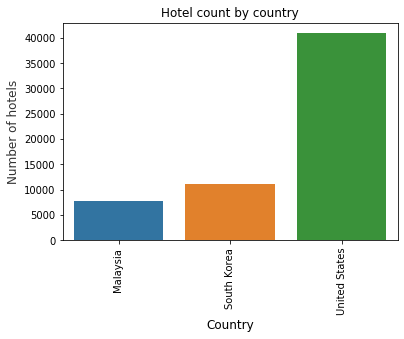

In [4]:
# plt.figure(figsize=(12,8))    # control the size of the chart
sns.barplot(htl_cnt_by_country.countrynameen, htl_cnt_by_country.masterhotelid)

plt.ylabel('Number of hotels', alpha=0.8,fontsize=12)  # alpha controls transparency of the label
plt.xlabel('Country', fontsize=12)
plt.title('Hotel count by country')
plt.xticks(rotation='vertical')
plt.show()

### Method 2

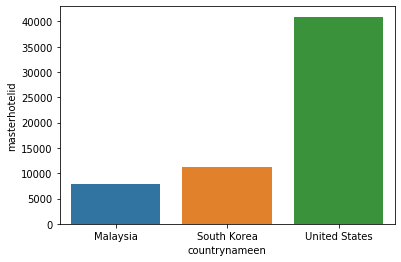

In [5]:
sns.barplot(x = "countrynameen", y = "masterhotelid", data = htl_cnt_by_country)

## Other parameters

### `hue`

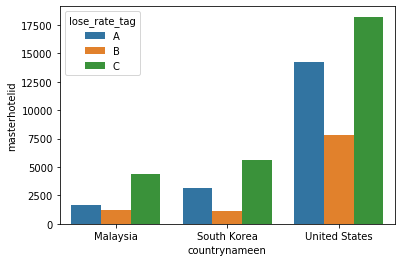

In [6]:
htl_cnt_by_country_2 = df.groupby(["countrynameen","lose_rate_tag"])["masterhotelid"].aggregate("count").reset_index()

sns.barplot(x = "countrynameen", y = "masterhotelid", hue="lose_rate_tag" ,data = htl_cnt_by_country_2)

### `estimator`
Used to decide how you gonna aggregate the data.

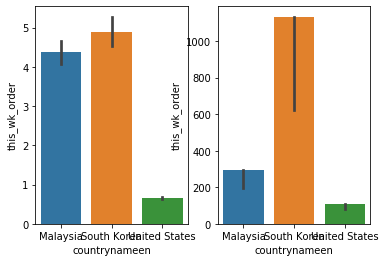

In [7]:
fig, axes = plt.subplots(1,2)

sns.barplot(x = "countrynameen", y = "this_wk_order", data = df, ax=axes[0]) # Left chart (Average) -> default
sns.barplot(x = "countrynameen", y = "this_wk_order", estimator=np.max, data = df, ax=axes[1]) # right chart (max)